In [1]:
!python -m venv myenv

In [2]:
#importing the libraries relevant for the analysis
import pandas as pd
import seaborn as sns #relevant for the data visualization
import matplotlib.pyplot as plt #relevant for the data visualization
import numpy as np
import datetime as dt

In [3]:
url='https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
df=pd.read_html(url)
df=df[0] #initially it was a list object which should be converted to the df object after
df=pd.DataFrame(df) #convert the df to pandas object

In [4]:
#check the data types
df.dtypes

Wk              float64
Day              object
Date             object
Time             object
Home             object
xG              float64
Score            object
xG.1            float64
Away             object
Attendance      float64
Venue            object
Referee          object
Match Report     object
Notes           float64
dtype: object

In [5]:
#data transformation step 

#1 drop the unhappened matches
df_cleaned=df.dropna(subset=['Attendance'])


#2 create two new columns to analyze the amount of goals per team & home vs away goals
df_cleaned[['Home Goals','Away Goals']]=df_cleaned['Score'].str.split("–",expand=True)


#3 convert two new columns to numeric type(int) to allow aggregation operations later
df_cleaned['Home Goals'] = pd.to_numeric(df_cleaned['Home Goals']).astype(int)
df_cleaned['Away Goals'] = pd.to_numeric(df_cleaned['Away Goals']).astype(int)


#4 convert some columns to the other data types to proceed with the analysis
df_cleaned['Attendance']=pd.to_numeric(df_cleaned['Attendance']).astype(int)
df_cleaned['Date']=pd.to_datetime(df_cleaned['Date'])


#5there`s no points columns so far in the table, so it`s needed to add it
points_home=[]
points_away=[]

for index, row in df_cleaned.iterrows():
    if row['Home Goals'] > row['Away Goals']:
        # Home team wins
        points_home.append(3)
        points_away.append(0)
    elif row['Home Goals'] == row['Away Goals']:
        # Draw
        points_home.append(1)
        points_away.append(1)
    elif row['Away Goals'] > row['Home Goals']:
        # Away team wins
        points_home.append(0)
        points_away.append(3)

df_cleaned['Points Home']=points_home
df_cleaned['Points Away']=points_away


#6 There's no practical use from the below columns, so we'll remove them
df_cleaned=df_cleaned.drop(columns=['Notes','Match Report'],axis=1)

C:\Users\linat\AppData\Local\Temp\ipykernel_8636\3561221992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Home Goals','Away Goals']]=df_cleaned['Score'].str.split("–",expand=True)
C:\Users\linat\AppData\Local\Temp\ipykernel_8636\3561221992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Home Goals','Away Goals']]=df_cleaned['Score'].str.split("–",expand=True)
C:\Users\linat\AppData\Local\Temp\ipykernel_8636\3561221992.py:12: SettingWithCopyWarning: 
A value is trying to b

In [6]:
#check if the data type change was correct 
df_cleaned.dtypes

Wk                    float64
Day                    object
Date           datetime64[ns]
Time                   object
Home                   object
xG                    float64
Score                  object
xG.1                  float64
Away                   object
Attendance              int32
Venue                  object
Referee                object
Home Goals              int32
Away Goals              int32
Points Home             int64
Points Away             int64
dtype: object

In [7]:
#find the match with the highest attendance
df_cleaned.loc[(df_cleaned[['Attendance']].idxmax())] #lock the id with the highest attendance

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Home Goals,Away Goals,Points Home,Points Away
116,11.0,Sun,2024-11-10,14:00,Manchester Utd,0.8,3–0,0.6,Leicester City,73829,Old Trafford,Peter Bankes,3,0,3,0


In [8]:
#find the match with the lowest attendance
df_cleaned.loc[(df_cleaned[['Attendance']].idxmin())] #lock the id with the minimum attendance

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Home Goals,Away Goals,Points Home,Points Away
189,18.0,Thu,2024-12-26,15:00,Bournemouth,1.4,0–0,0.4,Crystal Palace,11129,Vitality Stadium,Thomas Bramall,0,0,1,1


In [9]:
#home points and goals per team
df_home_points=(df_cleaned.groupby('Home')[['Points Home','Home Goals']]
                .sum()
                .sort_values(by='Points Home',ascending=False)
                .reset_index())
df_home_points.index=df_home_points.index+1
df_home_points.columns=['Club','Points','Home Goals']
df_home_points

,Club,Points,Home Goals
1,Brentford,23,29
2,Liverpool,23,20
3,Aston Villa,22,19
4,Arsenal,21,18
5,Manchester City,20,21
6,Bournemouth,18,12
7,Nott'ham Forest,18,12
8,Fulham,17,18
9,Newcastle Utd,17,15
10,Brighton,15,14


In [10]:
#away points and goals per team
df_away_points=(df_cleaned.groupby('Away')[['Points Away','Away Goals']]
                .sum()
                .sort_values(by='Points Away',ascending=False)
                .reset_index())
df_away_points.index=df_away_points.index+1
df_away_points.columns=['Club', 'Points','Away Goals']
df_away_points


,Club,Points,Away Goals
1,Liverpool,24,28
2,Nott'ham Forest,23,18
3,Chelsea,21,24
4,Arsenal,19,21
5,Newcastle Utd,18,19
6,Bournemouth,15,18
7,Manchester City,15,17
8,Brighton,13,16
9,Fulham,13,12
10,West Ham,12,11


In [11]:
# Create running total of away points (cumulative sum) per team ('Away') and date
df_away_points_date = (df_cleaned
                       .groupby(['Away', 'Date','Home'])[['Points Away','Away Goals']]
                       .sum()  # Sum the Points Away per group
                       .groupby(level=0)  # Apply cumsum for each club (level=0 corresponds to 'Away')
                       .cumsum()  # Cumulative sum of points for each club
                       .reset_index()
                       .rename(columns={'Away': 'Club', 'Date': 'Date', 'Points Away': 'Points Total','Home':'Opponent','Away Goals':'Away Goals Total'})
                       .sort_values(by='Club')
                       )

#small check
df_away_points_date[df_away_points_date['Club']=='Arsenal']

,Club,Date,Opponent,Points Total,Away Goals Total
0,Arsenal,2024-08-24,Aston Villa,3,2
1,Arsenal,2024-09-15,Tottenham,6,3
2,Arsenal,2024-09-22,Manchester City,7,5
3,Arsenal,2024-10-19,Bournemouth,7,5
4,Arsenal,2024-11-02,Newcastle Utd,7,5
5,Arsenal,2024-11-10,Chelsea,8,6
6,Arsenal,2024-11-30,West Ham,11,11
7,Arsenal,2024-12-08,Fulham,12,12
8,Arsenal,2024-12-21,Crystal Palace,15,17
9,Arsenal,2025-01-01,Brentford,18,20


In [12]:
# Create running total of away points (cumulative sum) per team ('Away') and date
df_away_points_date = (df_cleaned
                       .groupby(['Away', 'Date','Home'])[['Points Away','Away Goals']]
                       .sum()  # Sum the Points Away per group
                       .groupby(level=0)  # Apply cumsum for each club (level=0 corresponds to 'Away')
                       .cumsum()  # Cumulative sum of points for each club
                       .reset_index()
                       .rename(columns={
                           'Away': 'Club', 
                           'Date': 'Date', 
                           'Points Away': 'Points Total',
                           'Home':'Opponent',
                           'Away Goals':'Away Goals Total'})
                       .sort_values(by='Club')
                       )

#small check
df_away_points_date[df_away_points_date['Club']=='Arsenal']

,Club,Date,Opponent,Points Total,Away Goals Total
0,Arsenal,2024-08-24,Aston Villa,3,2
1,Arsenal,2024-09-15,Tottenham,6,3
2,Arsenal,2024-09-22,Manchester City,7,5
3,Arsenal,2024-10-19,Bournemouth,7,5
4,Arsenal,2024-11-02,Newcastle Utd,7,5
5,Arsenal,2024-11-10,Chelsea,8,6
6,Arsenal,2024-11-30,West Ham,11,11
7,Arsenal,2024-12-08,Fulham,12,12
8,Arsenal,2024-12-21,Crystal Palace,15,17
9,Arsenal,2025-01-01,Brentford,18,20


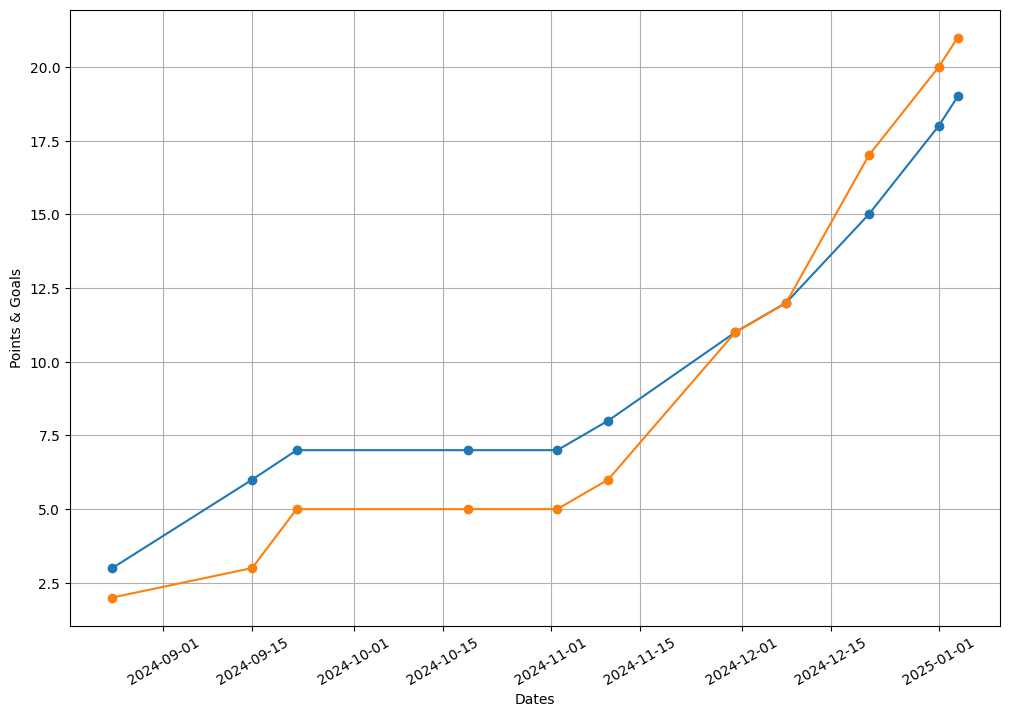

In [13]:
#check the points for Arsenal and look on the trend of the goals and points
df_arsenal_away=df_away_points_date[df_away_points_date['Club']=='Arsenal']

#build the trend chart for the points
plt.figure(figsize=(12,8))
plt.xlabel('Dates')
plt.ylabel('Points & Goals')
plt.xticks(rotation=30) #rotate date labels to improve the visibility
plt.grid(True)

plt.plot(df_arsenal_away['Date'],df_arsenal_away['Points Total'],label='Points Total',marker='o')
plt.plot(df_arsenal_away['Date'], df_arsenal_away['Away Goals Total'], label='Away Goals Total', marker='o')

In [14]:
# Create running total of points (cumulative sum) per team ('Home') and date
df_home_points_date = (df_cleaned
                       .groupby(['Home', 'Date','Away'])['Points Home']
                       .sum()  # Sum the Points Away per group
                       .groupby(level=0)  # Apply cumsum for each club (level=0 corresponds to 'Away')
                       .cumsum()  # Cumulative sum of points for each club
                       .reset_index()
                       .rename(columns={'Home': 'Club', 'Date': 'Date', 'Points Home': 'Points','Away':'Opponent'})
                       .sort_values(by='Club')
                       )
df_home_points_date[df_home_points_date['Club']=='Arsenal']

,Club,Date,Opponent,Points
0,Arsenal,2024-08-17,Wolves,3
1,Arsenal,2024-08-31,Brighton,4
2,Arsenal,2024-09-28,Leicester City,7
3,Arsenal,2024-10-05,Southampton,10
4,Arsenal,2024-10-27,Liverpool,11
5,Arsenal,2024-11-23,Nott'ham Forest,14
6,Arsenal,2024-12-04,Manchester Utd,17
7,Arsenal,2024-12-14,Everton,18
8,Arsenal,2024-12-27,Ipswich Town,21


In [15]:
# Filter matches where Southampton was either the Home or Away team
liverpool_matches = df_cleaned[(df_cleaned['Home'] == 'Liverpool') | (df_cleaned['Away'] == 'Liverpool')]

# Display the matches
liverpool_matches.sort_values(by='Wk',ascending=True)


,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Home Goals,Away Goals,Points Home,Points Away
1,1.0,Sat,2024-08-17,12:30,Ipswich Town,0.5,0–2,2.6,Liverpool,30014,Portman Road Stadium,Tim Robinson,0,2,0,3
20,2.0,Sun,2024-08-25,16:30,Liverpool,2.5,2–0,0.5,Brentford,60017,Anfield,Stuart Attwell,2,0,3,0
31,3.0,Sun,2024-09-01,16:00,Manchester Utd,1.4,0–3,1.8,Liverpool,73738,Old Trafford,Anthony Taylor,0,3,0,3
37,4.0,Sat,2024-09-14,15:00,Liverpool,0.9,0–1,0.4,Nott'ham Forest,60344,Anfield,Michael Oliver,0,1,0,3
45,5.0,Sat,2024-09-21,15:00,Liverpool,2.0,3–0,1.1,Bournemouth,60347,Anfield,Tony Harrington,3,0,3,0
61,6.0,Sat,2024-09-28,17:30,Wolves,0.6,1–2,2.5,Liverpool,31413,Molineux Stadium,Anthony Taylor,1,2,0,3
66,7.0,Sat,2024-10-05,12:30,Crystal Palace,0.6,0–1,1.4,Liverpool,25185,Selhurst Park,Simon Hooper,0,1,0,3
85,8.0,Sun,2024-10-20,16:30,Liverpool,1.9,2–1,1.0,Chelsea,60277,Anfield,John Brooks,2,1,3,0
97,9.0,Sun,2024-10-27,16:30,Arsenal,0.9,2–2,0.8,Liverpool,60383,Emirates Stadium,Anthony Taylor,2,2,1,1
101,10.0,Sat,2024-11-02,15:00,Liverpool,1.6,2–1,1.0,Brighton,60331,Anfield,Tony Harrington,2,1,3,0


In [20]:

#the goal of this function is to extract the date in the format of YYYY-MM
def date_modifier(date_column):
    play_dates=set()
    for week in date_column:
        if week not in play_dates:
                play_dates.add(week.strftime('%Y-%m')) #converting to YM format
    return sorted(list(play_dates)) #converting set to the sorted list to be used in the x_axis later

unique_dates=date_modifier(df_cleaned['Date']) #replacing the date_column parameter with the column i want to use
print(unique_dates)

['2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01']


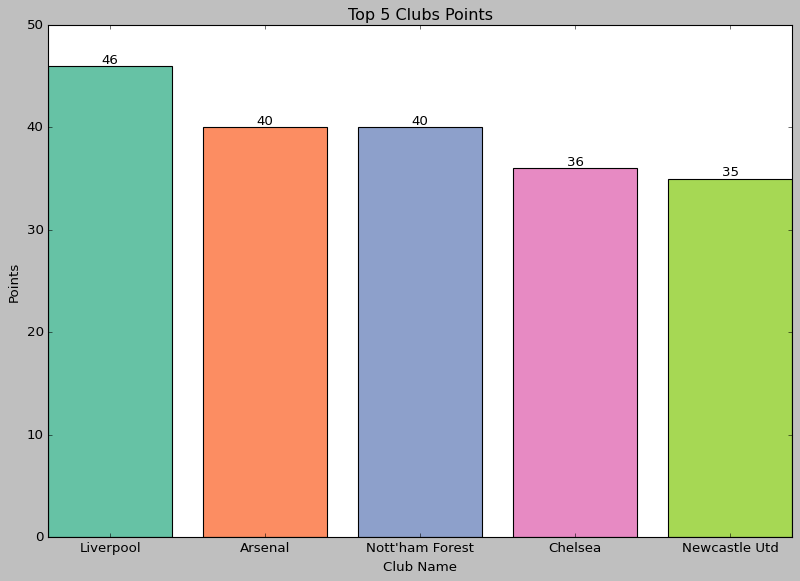

In [210]:
#build a graph with top 5 clubs points
#set up the graph size
plt.figure(figsize=(12,8))

#set up the style
plt.style.use('classic')

#select the palette
color_palette=sns.color_palette("Set2")

#set up the bars
bars=plt.bar(top_5_clubs.keys(),top_5_clubs.values(),color=color_palette)

for bar in bars:
    lbl=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,lbl,bar.get_height(),ha="center", va="bottom")

#add the title and label names
plt.title('Top 5 Clubs Points')
plt.xlabel('Club Name')
plt.ylabel('Points')
plt.show()

In [ ]:
df_cleaned.sort_values(by='Home')

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Home Goals,Away Goals,Points Home,Points Away,Month
149,14.0,Wed,2024-12-04,20:15,Arsenal,2.1,2–0,0.2,Manchester Utd,60256,Emirates Stadium,Samuel Barrott,2,0,3,0,2024-12
57,6.0,Sat,2024-09-28,15:00,Arsenal,4.4,4–2,0.3,Leicester City,60323,Emirates Stadium,Samuel Barrott,4,2,3,0,2024-09
97,9.0,Sun,2024-10-27,16:30,Arsenal,0.9,2–2,0.8,Liverpool,60383,Emirates Stadium,Anthony Taylor,2,2,1,1,2024-10
5,1.0,Sat,2024-08-17,15:00,Arsenal,1.2,2–0,0.5,Wolves,60261,Emirates Stadium,Jarred Gillett,2,0,3,0,2024-08
196,18.0,Fri,2024-12-27,20:15,Arsenal,1.8,1–0,0.2,Ipswich Town,60271,Emirates Stadium,Darren England,1,0,3,0,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,13.0,Sat,2024-11-30,15:00,Wolves,0.5,2–4,3.3,Bournemouth,26685,Molineux Stadium,Peter Bankes,2,4,0,3,2024-11
84,8.0,Sun,2024-10-20,14:00,Wolves,0.8,1–2,1.6,Manchester City,31319,Molineux Stadium,Chris Kavanagh,1,2,0,3,2024-10
193,18.0,Thu,2024-12-26,17:30,Wolves,0.9,2–0,0.4,Manchester Utd,31407,Molineux Stadium,Tony Harrington,2,0,3,0,2024-12
105,10.0,Sat,2024-11-02,17:30,Wolves,1.5,2–2,2.4,Crystal Palace,31124,Molineux Stadium,Anthony Taylor,2,2,1,1,2024-11


In [450]:
#create a list of all Arsenal away & home games
arsenal_away=df_cleaned[df_cleaned['Away']=='Arsenal']
arsenal_home=df_cleaned[df_cleaned['Home']=='Arsenal']

In [ ]:
arsenal_concat=pd.concat([arsenal_away,arsenal_home]).sort_values(by='Date',ascending=True)
arsenal_concat

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Home Goals,Away Goals,Points Home,Points Away,Month
5,1.0,Sat,2024-08-17,15:00,Arsenal,1.2,2–0,0.5,Wolves,60261,Emirates Stadium,Jarred Gillett,2,0,3,0,2024-08
17,2.0,Sat,2024-08-24,17:30,Aston Villa,1.2,0–2,0.9,Arsenal,41587,Villa Park,Michael Oliver,0,2,0,3,2024-08
22,3.0,Sat,2024-08-31,12:30,Arsenal,2.1,1–1,1.7,Brighton,60326,Emirates Stadium,Chris Kavanagh,1,1,1,1,2024-08
41,4.0,Sun,2024-09-15,14:00,Tottenham,0.7,0–1,0.7,Arsenal,61645,Tottenham Hotspur Stadium,Jarred Gillett,0,1,0,3,2024-09
53,5.0,Sun,2024-09-22,16:30,Manchester City,2.1,2–2,0.7,Arsenal,52846,Etihad Stadium,Michael Oliver,2,2,1,1,2024-09
57,6.0,Sat,2024-09-28,15:00,Arsenal,4.4,4–2,0.3,Leicester City,60323,Emirates Stadium,Samuel Barrott,4,2,3,0,2024-09
70,7.0,Sat,2024-10-05,15:00,Arsenal,2.8,3–1,0.6,Southampton,60307,Emirates Stadium,Tony Harrington,3,1,3,0,2024-10
83,8.0,Sat,2024-10-19,17:30,Bournemouth,1.8,2–0,0.7,Arsenal,11235,Vitality Stadium,Robert Jones,2,0,3,0,2024-10
97,9.0,Sun,2024-10-27,16:30,Arsenal,0.9,2–2,0.8,Liverpool,60383,Emirates Stadium,Anthony Taylor,2,2,1,1,2024-10
99,10.0,Sat,2024-11-02,12:30,Newcastle Utd,0.5,1–0,1.1,Arsenal,52249,St James' Park,John Brooks,1,0,3,0,2024-11
